## 1. Exploración de Datos (EDA) y Limpieza de Datos

**Objetivo**: Familiarizarse con la estructura, características y posibles problemas de los datasets, además de limpiar los datos si es necesario.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway


In [2]:
# Cargar los datasets
df_demo = pd.read_csv('df_final_demo.txt', delimiter=',')  # Usa el delimitador adecuado
df_web_pt1 = pd.read_csv('df_final_web_data_pt_1.txt', delimiter=',')
df_web_pt2 = pd.read_csv('df_final_web_data_pt_2.txt', delimiter=',')
df_experiment = pd.read_csv('df_final_experiment_clients.txt', delimiter=',')



Creamos una función para la primera exploracion de los datos.

In [3]:
# Función para exploración de los datos
def df_exploration(df):
    # Revisión básica de los datos
    print(df.info())  # Para revisar los tipos de datos
    print(f"\nValores duplicados: {df.duplicated().sum()}")  # Revisa si hay duplicados en los datasets
    print(f"\nValores nulos: \n{df.isnull().sum()}") # Revisar valores nulos
    print (f"\nValores unicos: \n{df.nunique()}") # Revisar valores unicos
    return df



Exploramos todos los df

In [4]:
df_exploration(df_demo)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
None

Valores duplicados: 0

Valores nulos: 
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

Valores unicos: 
client_id           70609
clnt

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0         836976             6.0              73.0      60.5     U        2.0   
1        2304905             7.0              94.0      58.0     U        2.0   
2        1439522             5.0              64.0      32.0     U        2.0   
3        1562045            16.0             198.0      49.0     M        2.0   
4        5126305            12.0             145.0      33.0     F        2.0   
...          ...             ...               ...       ...   ...        ...   
70604    7993686             4.0              56.0      38.5     U        3.0   
70605    8981690            12.0             148.0      31.0     M        2.0   
70606     333913            16.0             198.0      61.5     F        2.0   
70607    1573142            21.0             255.0      68.0     M        3.0   
70608    5602139            21.0             254.0      59.5     F        3.0   

              bal  calls_6_mnth  logons_6_mnth  
0        45105.30           6.0            9.0  
1       110860.30           6.0            9.0  
2        52467.79           6.0            9.0  
3        67454.65           3.0            6.0  
4       103671.75           0.0            3.0  
...           ...           ...            ...  
70604  1411062.68           5.0            5.0  
70605   101867.07           6.0            6.0  
70606    40745.00           3.0            3.0  
70607   475114.69           4.0            4.0  
70608   157498.73           7.0            7.0  

[70609 rows x 9 columns]

Eliminamos clientes que tienen todos los valores nulos

In [5]:
df_demo = df_demo.dropna(how='all', subset=df_demo.columns.difference(['client_id']))

In [6]:
# Sustituir los valores nulos en 'clnt_age' por la media calculada
df_demo['clnt_age'].fillna(df_demo['clnt_age'].mean(), inplace=True)

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_22784\3213248825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['clnt_age'].fillna(df_demo['clnt_age'].mean(), inplace=True)


In [7]:
df_demo['gendr'].value_counts()

U    24122
M    23724
F    22746
X        3
Name: gendr, dtype: int64

In [8]:
# Reemplazar los valores 'X' por 'U'
df_demo['gendr'] = df_demo['gendr'].replace('X', 'U')

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_22784\2751592922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['gendr'] = df_demo['gendr'].replace('X', 'U')


In [9]:
df_exploration(df_web_pt1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB
None

Valores duplicados: 2095

Valores nulos: 
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

Valores unicos: 
client_id        58391
visitor_id       62936
visit_id         75256
process_step         5
date_time       282666
dtype: int64


client_id             visitor_id                      visit_id  \
0         9988021   580560515_7732621733  781255054_21935453173_531117   
1         9988021   580560515_7732621733  781255054_21935453173_531117   
2         9988021   580560515_7732621733  781255054_21935453173_531117   
3         9988021   580560515_7732621733  781255054_21935453173_531117   
4         9988021   580560515_7732621733  781255054_21935453173_531117   
...           ...                    ...                           ...   
343136    2443347  465784886_73090545671  136329900_10529659391_316129   
343137    2443347  465784886_73090545671  136329900_10529659391_316129   
343138    2443347  465784886_73090545671  136329900_10529659391_316129   
343139    2443347  465784886_73090545671  136329900_10529659391_316129   
343140    2443347  465784886_73090545671  136329900_10529659391_316129   

       process_step            date_time  
0            step_3  2017-04-17 15:27:07  
1            step_2  2017-04-17 15:26:51  
2            step_3  2017-04-17 15:19:22  
3            step_2  2017-04-17 15:19:13  
4            step_3  2017-04-17 15:18:04  
...             ...                  ...  
343136      confirm  2017-03-31 15:15:46  
343137       step_3  2017-03-31 15:14:53  
343138       step_2  2017-03-31 15:12:08  
343139       step_1  2017-03-31 15:11:37  
343140        start  2017-03-31 15:10:47  

[343141 rows x 5 columns]

In [10]:
df_exploration(df_web_pt2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB
None

Valores duplicados: 8669

Valores nulos: 
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

Valores unicos: 
client_id        67430
visitor_id       71042
visit_id         82841
process_step         5
date_time       346697
dtype: int64


client_id             visitor_id                      visit_id  \
0          763412  601952081_10457207388  397475557_40440946728_419634   
1         6019349  442094451_91531546617  154620534_35331068705_522317   
2         6019349  442094451_91531546617  154620534_35331068705_522317   
3         6019349  442094451_91531546617  154620534_35331068705_522317   
4         6019349  442094451_91531546617  154620534_35331068705_522317   
...           ...                    ...                           ...   
412259    9668240   388766751_9038881013   922267647_3096648104_968866   
412260    9668240   388766751_9038881013   922267647_3096648104_968866   
412261    9668240   388766751_9038881013   922267647_3096648104_968866   
412262    9668240   388766751_9038881013   922267647_3096648104_968866   
412263     674799  947159805_81558194550   86152093_47511127657_716022   

       process_step            date_time  
0           confirm  2017-06-06 08:56:00  
1           confirm  2017-06-01 11:59:27  
2            step_3  2017-06-01 11:58:48  
3            step_2  2017-06-01 11:58:08  
4            step_1  2017-06-01 11:57:58  
...             ...                  ...  
412259        start  2017-05-24 18:46:10  
412260        start  2017-05-24 18:45:29  
412261       step_1  2017-05-24 18:44:51  
412262        start  2017-05-24 18:44:34  
412263        start  2017-06-03 12:17:09  

[412264 rows x 5 columns]

In [11]:
df_exploration(df_experiment)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None

Valores duplicados: 0

Valores nulos: 
client_id        0
Variation    20109
dtype: int64

Valores unicos: 
client_id    70609
Variation        2
dtype: int64


client_id Variation
0        9988021      Test
1        8320017      Test
2        4033851   Control
3        1982004      Test
4        9294070   Control
...          ...       ...
70604    2443347       NaN
70605    8788427       NaN
70606     266828       NaN
70607    1266421       NaN
70608    9895983       NaN

[70609 rows x 2 columns]

In [12]:
# Eliminamos valores nulos
df_experiment.dropna(inplace=True)

Unimos los df con el registro detallado de las interacciones de los clientes.

In [13]:
# Unir los datasets pt_1 y pt_2
df_web_combined = pd.concat([df_web_pt1, df_web_pt2], axis=0, ignore_index=True)

In [14]:
# Revisión del nuevo df
df_exploration(df_web_combined)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB
None

Valores duplicados: 10764

Valores nulos: 
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

Valores unicos: 
client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64


client_id             visitor_id                      visit_id  \
0         9988021   580560515_7732621733  781255054_21935453173_531117   
1         9988021   580560515_7732621733  781255054_21935453173_531117   
2         9988021   580560515_7732621733  781255054_21935453173_531117   
3         9988021   580560515_7732621733  781255054_21935453173_531117   
4         9988021   580560515_7732621733  781255054_21935453173_531117   
...           ...                    ...                           ...   
755400    9668240   388766751_9038881013   922267647_3096648104_968866   
755401    9668240   388766751_9038881013   922267647_3096648104_968866   
755402    9668240   388766751_9038881013   922267647_3096648104_968866   
755403    9668240   388766751_9038881013   922267647_3096648104_968866   
755404     674799  947159805_81558194550   86152093_47511127657_716022   

       process_step            date_time  
0            step_3  2017-04-17 15:27:07  
1            step_2  2017-04-17 15:26:51  
2            step_3  2017-04-17 15:19:22  
3            step_2  2017-04-17 15:19:13  
4            step_3  2017-04-17 15:18:04  
...             ...                  ...  
755400        start  2017-05-24 18:46:10  
755401        start  2017-05-24 18:45:29  
755402       step_1  2017-05-24 18:44:51  
755403        start  2017-05-24 18:44:34  
755404        start  2017-06-03 12:17:09  

[755405 rows x 5 columns]

In [15]:
df_web_combined['date_time'] = pd.to_datetime(df_web_combined['date_time'], format='%Y-%m-%d %H:%M:%S')

In [16]:
# Revisión del nuevo df
df_exploration(df_web_combined)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     755405 non-null  int64         
 1   visitor_id    755405 non-null  object        
 2   visit_id      755405 non-null  object        
 3   process_step  755405 non-null  object        
 4   date_time     755405 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 28.8+ MB
None

Valores duplicados: 10764

Valores nulos: 
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

Valores unicos: 
client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64


client_id             visitor_id                      visit_id  \
0         9988021   580560515_7732621733  781255054_21935453173_531117   
1         9988021   580560515_7732621733  781255054_21935453173_531117   
2         9988021   580560515_7732621733  781255054_21935453173_531117   
3         9988021   580560515_7732621733  781255054_21935453173_531117   
4         9988021   580560515_7732621733  781255054_21935453173_531117   
...           ...                    ...                           ...   
755400    9668240   388766751_9038881013   922267647_3096648104_968866   
755401    9668240   388766751_9038881013   922267647_3096648104_968866   
755402    9668240   388766751_9038881013   922267647_3096648104_968866   
755403    9668240   388766751_9038881013   922267647_3096648104_968866   
755404     674799  947159805_81558194550   86152093_47511127657_716022   

       process_step           date_time  
0            step_3 2017-04-17 15:27:07  
1            step_2 2017-04-17 15:26:51  
2            step_3 2017-04-17 15:19:22  
3            step_2 2017-04-17 15:19:13  
4            step_3 2017-04-17 15:18:04  
...             ...                 ...  
755400        start 2017-05-24 18:46:10  
755401        start 2017-05-24 18:45:29  
755402       step_1 2017-05-24 18:44:51  
755403        start 2017-05-24 18:44:34  
755404        start 2017-06-03 12:17:09  

[755405 rows x 5 columns]

In [17]:
# Eliminar duplicados
df_web_combined.drop_duplicates(inplace=True)

In [18]:
df_web_combined["process_step"] = df_web_combined["process_step"].replace({'start' : 1, 'step_1' : 2, 'step_2' : 3, 'step_3' : 4, 'confirm' : 5})

In [19]:
df_web_combined

client_id             visitor_id                      visit_id  \
0         9988021   580560515_7732621733  781255054_21935453173_531117   
1         9988021   580560515_7732621733  781255054_21935453173_531117   
2         9988021   580560515_7732621733  781255054_21935453173_531117   
3         9988021   580560515_7732621733  781255054_21935453173_531117   
4         9988021   580560515_7732621733  781255054_21935453173_531117   
...           ...                    ...                           ...   
755400    9668240   388766751_9038881013   922267647_3096648104_968866   
755401    9668240   388766751_9038881013   922267647_3096648104_968866   
755402    9668240   388766751_9038881013   922267647_3096648104_968866   
755403    9668240   388766751_9038881013   922267647_3096648104_968866   
755404     674799  947159805_81558194550   86152093_47511127657_716022   

        process_step           date_time  
0                  4 2017-04-17 15:27:07  
1                  3 2017-04-17 15:26:51  
2                  4 2017-04-17 15:19:22  
3                  3 2017-04-17 15:19:13  
4                  4 2017-04-17 15:18:04  
...              ...                 ...  
755400             1 2017-05-24 18:46:10  
755401             1 2017-05-24 18:45:29  
755402             2 2017-05-24 18:44:51  
755403             1 2017-05-24 18:44:34  
755404             1 2017-06-03 12:17:09  

[744641 rows x 5 columns]

In [20]:
# Ordenar los datos por client_id, visit_id y date_time
web_data_final = df_web_combined.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Añadir la hora del paso posterior
web_data_final['next_date_time'] = web_data_final.groupby(['client_id', 'visit_id'])['date_time'].shift(-1)

# Calcular la diferencia de tiempo entre el paso actual y el siguiente
web_data_final['time_diff'] = web_data_final['next_date_time'] - web_data_final['date_time']

# Convertir la diferencia de tiempo a segundos
web_data_final['time_diff_seconds'] = web_data_final['time_diff'].dt.total_seconds()

In [21]:
web_data_final.head(30)

client_id             visitor_id                      visit_id  \
285515        169  201385055_71273495308  749567106_99161211863_557568   
285514        169  201385055_71273495308  749567106_99161211863_557568   
285513        169  201385055_71273495308  749567106_99161211863_557568   
285512        169  201385055_71273495308  749567106_99161211863_557568   
285511        169  201385055_71273495308  749567106_99161211863_557568   
628456        336    64757908_3400128256  649044751_80905125055_554468   
628331        336    64757908_3400128256  649044751_80905125055_554468   
442857        546  475037402_89828530214    731811517_9330176838_94847   
442856        546  475037402_89828530214    731811517_9330176838_94847   
442855        546  475037402_89828530214    731811517_9330176838_94847   
442854        546  475037402_89828530214    731811517_9330176838_94847   
442853        546  475037402_89828530214    731811517_9330176838_94847   
72018         555  402506806_56087378777  637149525_38041617439_716659   
72017         555  402506806_56087378777  637149525_38041617439_716659   
72016         555  402506806_56087378777  637149525_38041617439_716659   
72015         555  402506806_56087378777  637149525_38041617439_716659   
72014         555  402506806_56087378777  637149525_38041617439_716659   
138182        647   66758770_53988066587   40369564_40101682850_311847   
138181        647   66758770_53988066587   40369564_40101682850_311847   
138180        647   66758770_53988066587   40369564_40101682850_311847   
138179        647   66758770_53988066587   40369564_40101682850_311847   
138176        647   66758770_53988066587   40369564_40101682850_311847   
245500        722  919259913_64837298108  984487154_55831795985_521110   
245499        722  919259913_64837298108  984487154_55831795985_521110   
245498        722  919259913_64837298108  984487154_55831795985_521110   
245497        722  919259913_64837298108  984487154_55831795985_521110   
245496        722  919259913_64837298108  984487154_55831795985_521110   
245495        722  919259913_64837298108  984487154_55831795985_521110   
245494        722  919259913_64837298108  984487154_55831795985_521110   
245493        722  919259913_64837298108  984487154_55831795985_521110   

        process_step           date_time      next_date_time       time_diff  \
285515             1 2017-04-12 20:19:36 2017-04-12 20:19:45 0 days 00:00:09   
285514             2 2017-04-12 20:19:45 2017-04-12 20:20:31 0 days 00:00:46   
285513             3 2017-04-12 20:20:31 2017-04-12 20:22:05 0 days 00:01:34   
285512             4 2017-04-12 20:22:05 2017-04-12 20:23:09 0 days 00:01:04   
285511             5 2017-04-12 20:23:09                 NaT             NaT   
628456             1 2017-06-01 07:26:55 2017-06-01 07:42:43 0 days 00:15:48   
628331             1 2017-06-01 07:42:43                 NaT             NaT   
442857             1 2017-06-17 10:03:29 2017-06-17 10:03:39 0 days 00:00:10   
442856             2 2017-06-17 10:03:39 2017-06-17 10:03:52 0 days 00:00:13   
442855             3 2017-06-17 10:03:52 2017-06-17 10:05:19 0 days 00:01:27   
442854             4 2017-06-17 10:05:19 2017-06-17 10:05:42 0 days 00:00:23   
442853             5 2017-06-17 10:05:42                 NaT             NaT   
72018              1 2017-04-15 12:57:56 2017-04-15 12:58:03 0 days 00:00:07   
72017              2 2017-04-15 12:58:03 2017-04-15 12:58:35 0 days 00:00:32   
72016              3 2017-04-15 12:58:35 2017-04-15 13:00:14 0 days 00:01:39   
72015              4 2017-04-15 13:00:14 2017-04-15 13:00:34 0 days 00:00:20   
72014              5 2017-04-15 13:00:34                 NaT             NaT   
138182             1 2017-04-12 15:41:28 2017-04-12 15:41:35 0 days 00:00:07   
138181             2 2017-04-12 15:41:35 2017-04-12 15:41:53 0 days 00:00:18   
138180             3 2017-04-12 15:41:53 2017-04-12 15:45:02 0 days 00:03:09   
138179             4 2017-04-12 1

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_22784\1082311122.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=process_counts.index, y=process_counts.values, palette='viridis')


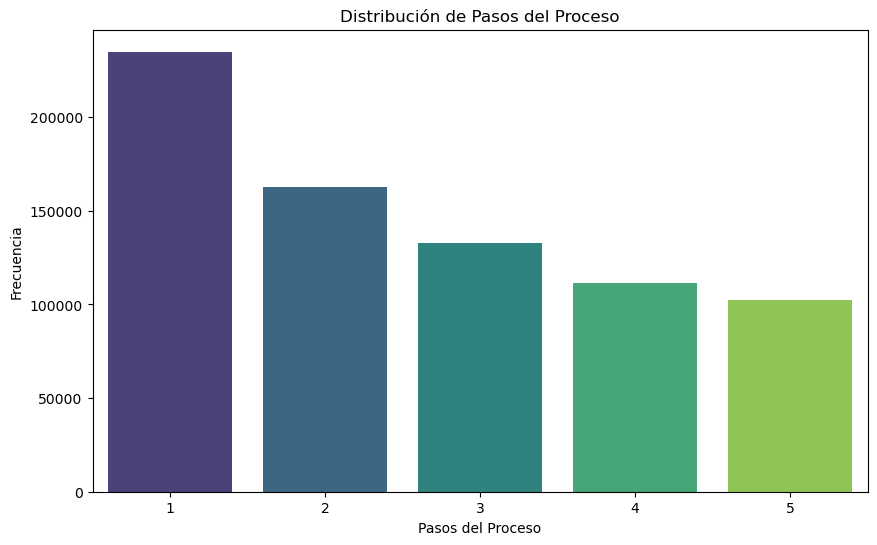

In [22]:
# Contar la frecuencia de cada 'process_step'
process_counts = df_web_combined['process_step'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=process_counts.index, y=process_counts.values, palette='viridis')
plt.title('Distribución de Pasos del Proceso')
plt.xlabel('Pasos del Proceso')
plt.ylabel('Frecuencia')
plt.show()

## 2. Análisis del Comportamiento del Cliente

Objetivo: Entender el perfil de los clientes que usan el proceso online.
Paso 1: ¿Quiénes son los clientes principales?

In [23]:
# Estadísticas descriptivas
df_demo.describe()

client_id  clnt_tenure_yr  clnt_tenure_mnth      clnt_age  \
count  7.059500e+04    70595.000000      70595.000000  70595.000000   
mean   5.005021e+06       12.052950        150.659367     46.442240   
std    2.877269e+06        6.871819         82.089854     15.591162   
min    1.690000e+02        2.000000         33.000000     13.500000   
25%    2.519604e+06        6.000000         82.000000     32.500000   
50%    5.016969e+06       11.000000        136.000000     47.000000   
75%    7.483064e+06       16.000000        192.000000     59.000000   
max    9.999839e+06       62.000000        749.000000     96.000000   

          num_accts           bal  calls_6_mnth  logons_6_mnth  
count  70595.000000  7.059500e+04  70595.000000   70595.000000  
mean       2.255528  1.474452e+05      3.382478       5.566740  
std        0.534997  3.015087e+05      2.236580       2.353286  
min        1.000000  1.378942e+04      0.000000       1.000000  
25%        2.000000  3.734683e+04      1.000000       4.000000  
50%        2.000000  6.333290e+04      3.000000       5.000000  
75%        2.000000  1.375449e+05      6.000000       7.000000  
max        8.000000  1.632004e+07      7.000000       9.000000

**Edad de los clientes**

Visualizamos la distribución de la edad para entender si los clientes más jóvenes o mayores son los que más utilizan el servicio.

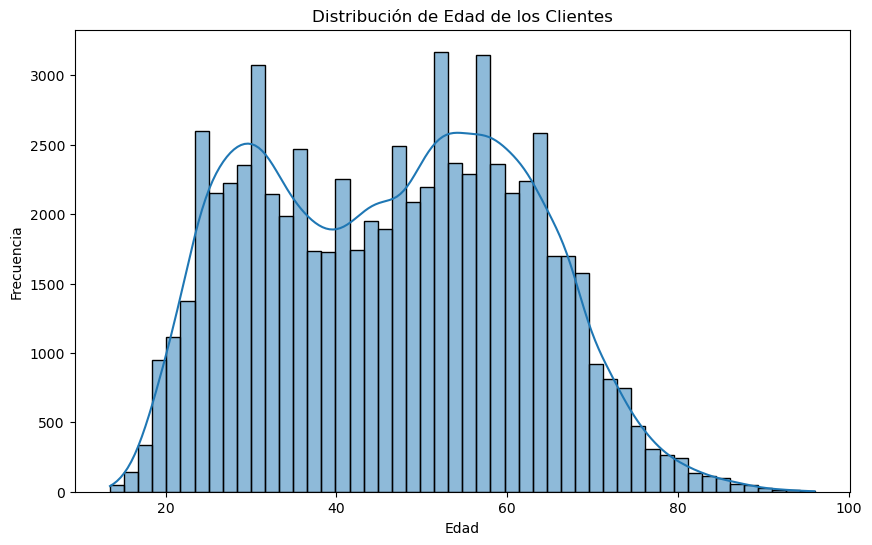

In [24]:
# Visualización de la distribución de edades
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_demo['clnt_age'], bins=50, kde=True)
plt.title('Distribución de Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**Duración como clientes**

Compara clientes nuevos frente a los clientes con mayor antigüedad

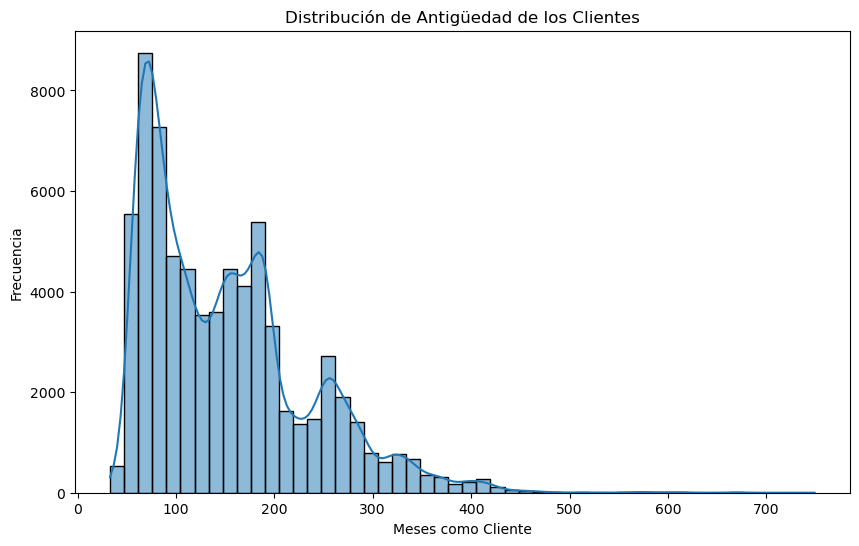

In [25]:
# Visualización de la distribución de tenencia
plt.figure(figsize=(10, 6))
sns.histplot(df_demo['clnt_tenure_mnth'], bins=50, kde=True)
plt.title('Distribución de Antigüedad de los Clientes')
plt.xlabel('Meses como Cliente')
plt.ylabel('Frecuencia')
plt.show()

**Distribución por género**

Exploramos la proporción de clientes según su género


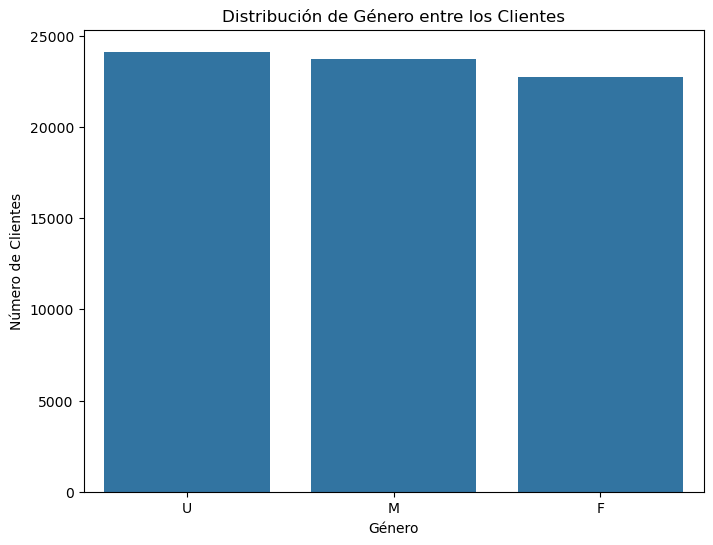

In [26]:
# Conteo de clientes por género
plt.figure(figsize=(8, 6))
sns.countplot(x='gendr', data=df_demo)
plt.title('Distribución de Género entre los Clientes')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.show()

**Análisis cruzado de edad y antigüedad**

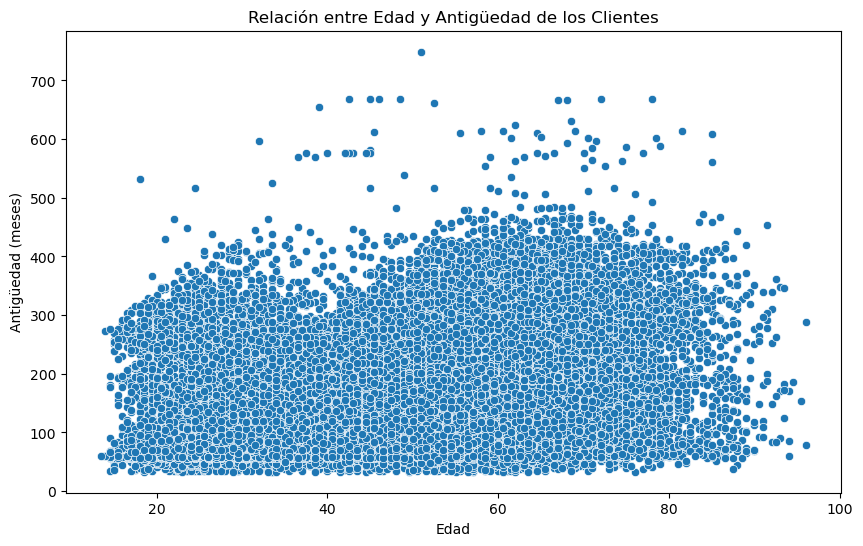

In [27]:
# Relación entre edad y tenencia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='clnt_age', y='clnt_tenure_mnth', data=df_demo)
plt.title('Relación entre Edad y Antigüedad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Antigüedad (meses)')
plt.show()

¿Qué tan a menudo inician sesión los clientes?

¿Cuántas veces contactan al servicio de atención al cliente?

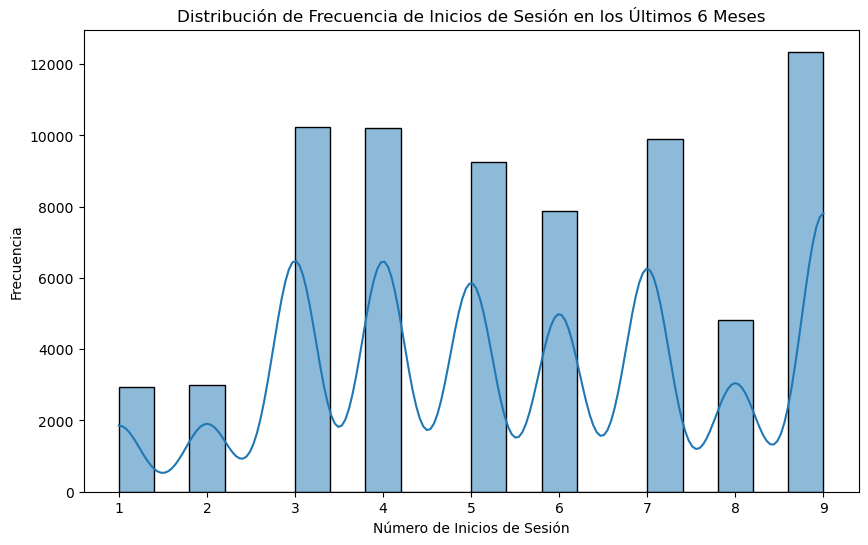

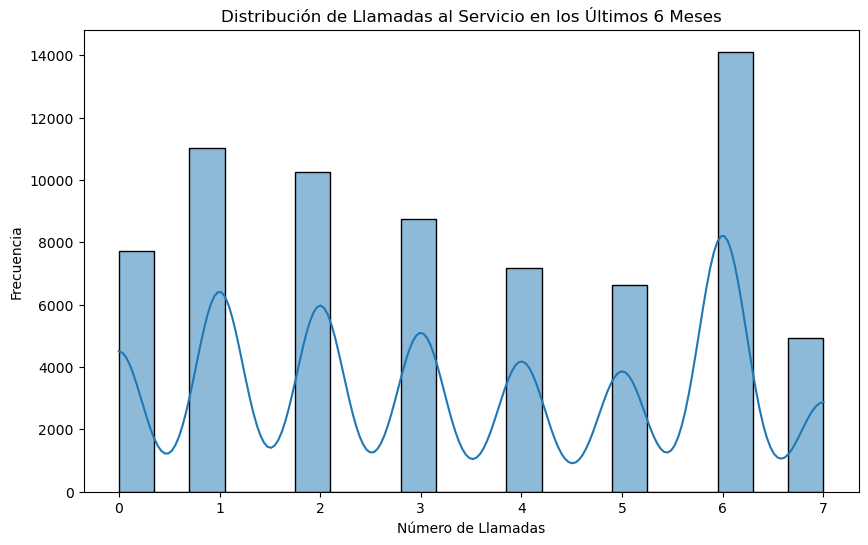

In [28]:
# Visualizar frecuencia de inicio de sesión
plt.figure(figsize=(10, 6))
sns.histplot(df_demo['logons_6_mnth'], bins=20, kde=True)
plt.title('Distribución de Frecuencia de Inicios de Sesión en los Últimos 6 Meses')
plt.xlabel('Número de Inicios de Sesión')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar frecuencia de llamadas al servicio de atención
plt.figure(figsize=(10, 6))
sns.histplot(df_demo['calls_6_mnth'], bins=20, kde=True)
plt.title('Distribución de Llamadas al Servicio en los Últimos 6 Meses')
plt.xlabel('Número de Llamadas')
plt.ylabel('Frecuencia')
plt.show()

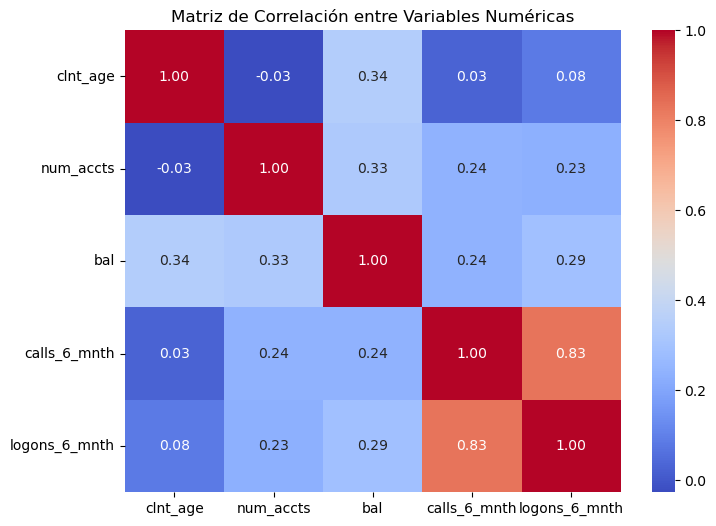

In [29]:
# Primero, seleccionamos las variables numéricas
numeric_vars = df_demo[['clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']]
# Calculamos la matriz de correlación
correlation_matrix = numeric_vars.corr(method='spearman')

# Visualizamos la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()



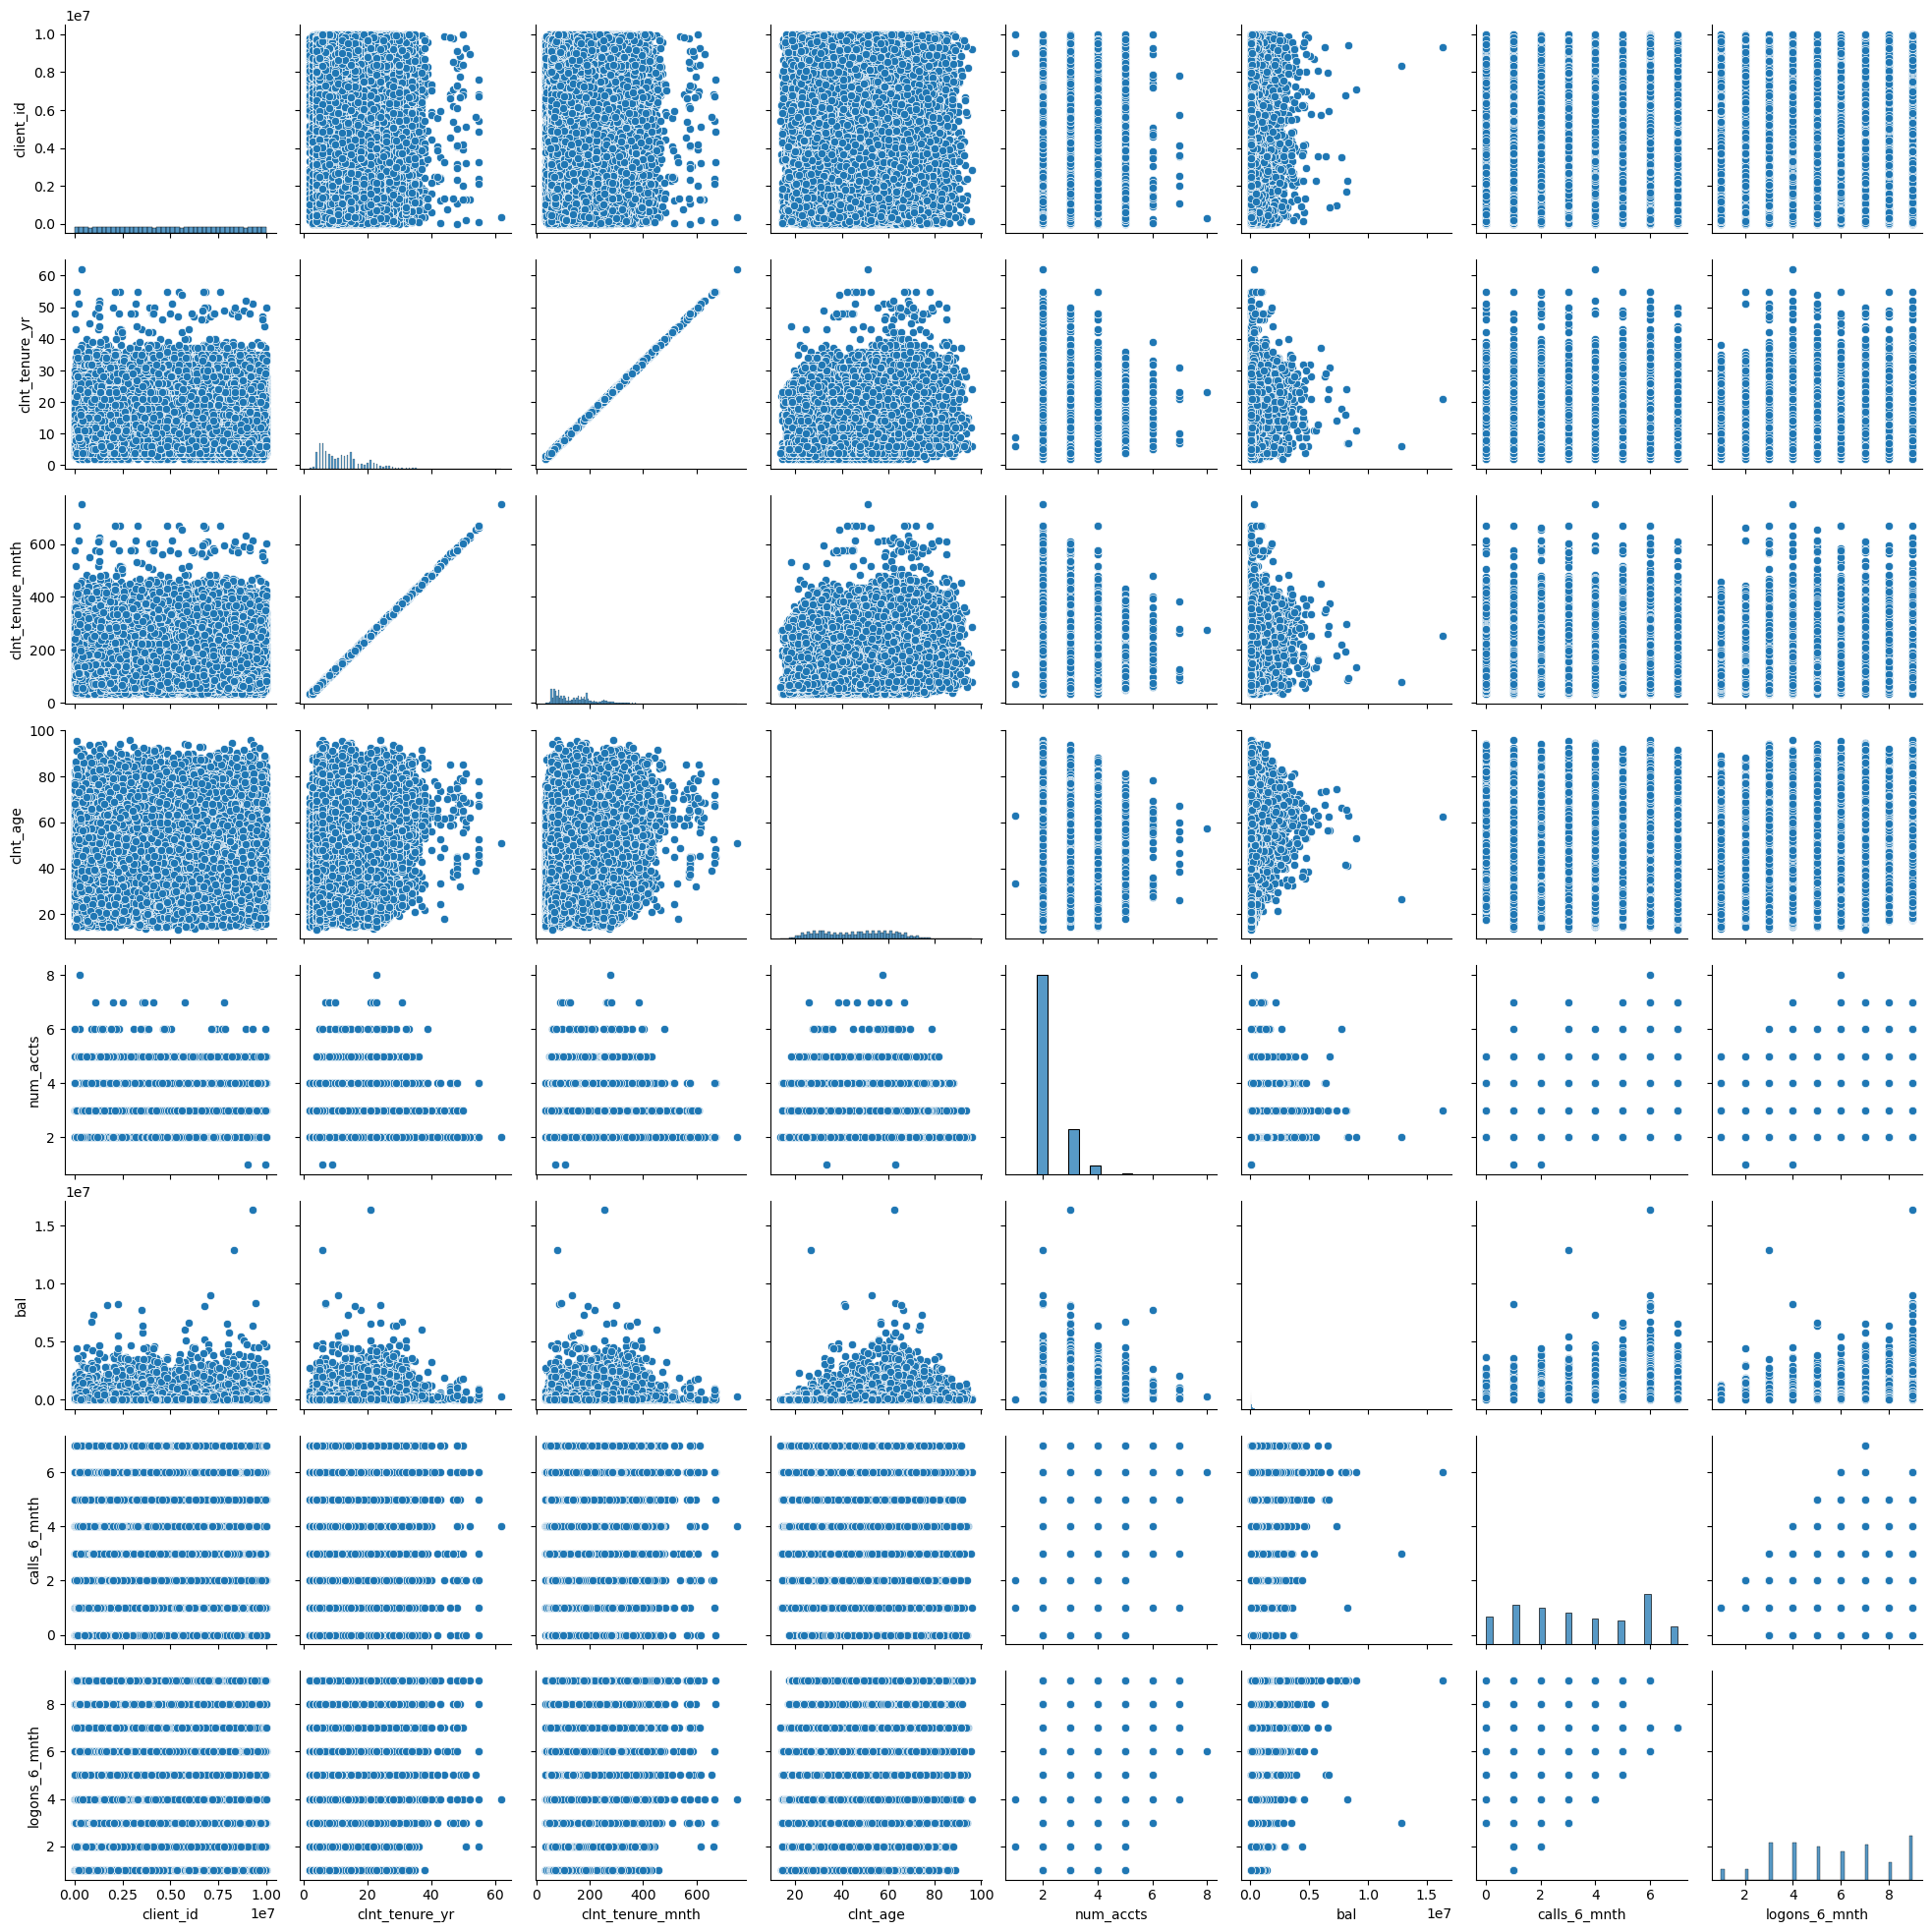

In [30]:
# Grafica de dispersión de balance y edad
sns.pairplot(df_demo)


In [31]:
# Creando una tabla de contingencia para Género y Número de cuentas
contingency_table = pd.crosstab(df_demo['gendr'], df_demo['num_accts'])

# Aplicando la prueba Chi-Cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-cuadrado: {chi2}, p-valor: {p_value}')

# Interpretación del p-valor
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: existe una relación significativa entre Género y Número de cuentas.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que existe una relación significativa.")

Chi-cuadrado: 697.0795477597428, p-valor: 1.0834286501848828e-139
Se rechaza la hipótesis nula: existe una relación significativa entre Género y Número de cuentas.


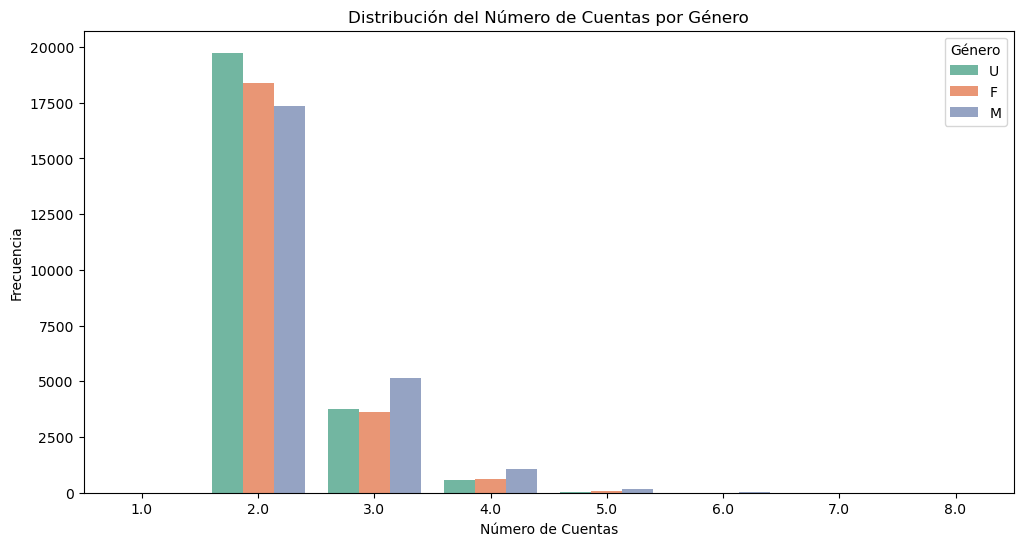

In [32]:
# Crear un gráfico de barras agrupadas: Distribución del Número de Cuentas por Género
plt.figure(figsize=(12, 6))
sns.countplot(data=df_demo, x='num_accts', hue='gendr', palette='Set2')

plt.title('Distribución del Número de Cuentas por Género')
plt.xlabel('Número de Cuentas')
plt.ylabel('Frecuencia')
plt.legend(title='Género')
plt.show()

In [33]:
# Creando una tabla de contingencia para Género y Número de llamadas
contingency_table = pd.crosstab(df_demo['gendr'], df_demo['calls_6_mnth'])

# Aplicando la prueba Chi-Cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-cuadrado: {chi2}, p-valor: {p_value}')

# Interpretación del p-valor
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: existe una relación significativa entre Género y Número de llamadas.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que existe una relación significativa.")

Chi-cuadrado: 935.9281707480802, p-valor: 8.616180589029502e-191
Se rechaza la hipótesis nula: existe una relación significativa entre Género y Número de llamadas.


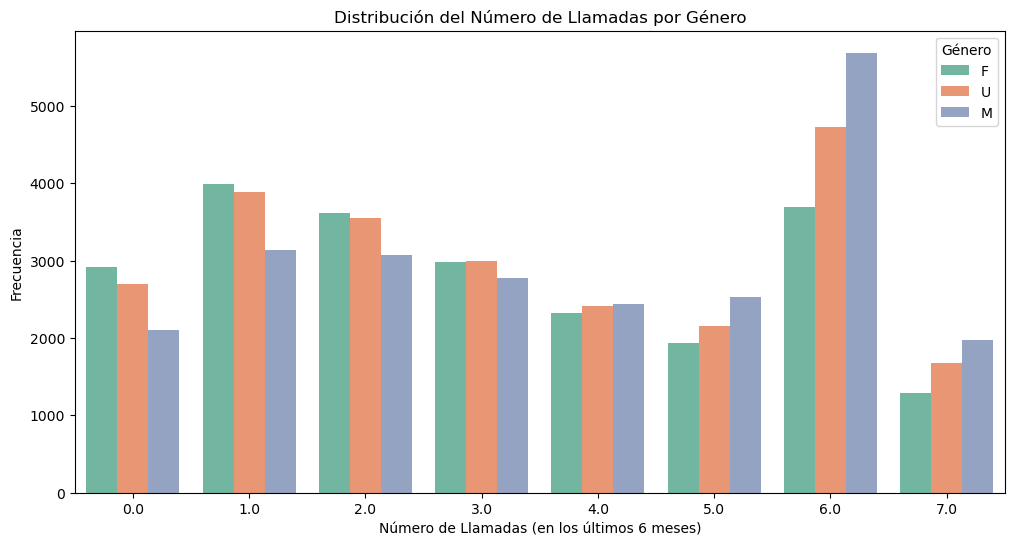

In [34]:
# Crear un gráfico de barras agrupadas: Distribución del Número de Llamadas por Género
plt.figure(figsize=(12, 6))
sns.countplot(data=df_demo, x='calls_6_mnth', hue='gendr', palette='Set2')

plt.title('Distribución del Número de Llamadas por Género')
plt.xlabel('Número de Llamadas (en los últimos 6 meses)')
plt.ylabel('Frecuencia')
plt.legend(title='Género')
plt.show()

In [35]:
# Creando una tabla de contingencia para Género y Número de logs
contingency_table = pd.crosstab(df_demo['gendr'], df_demo['logons_6_mnth'])

# Aplicando la prueba Chi-Cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-cuadrado: {chi2}, p-valor: {p_value}')

# Interpretación del p-valor
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: existe una relación significativa entre Género y Número de logs.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que existe una relación significativa.")

Chi-cuadrado: 839.59395234399, p-valor: 2.241916225398802e-168
Se rechaza la hipótesis nula: existe una relación significativa entre Género y Número de logs.


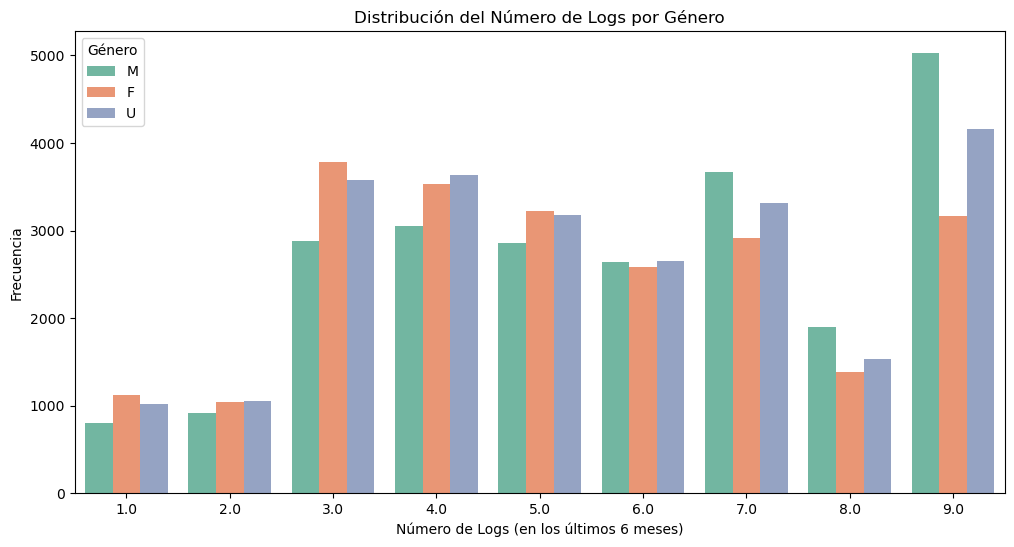

In [36]:
# Crear un gráfico de barras agrupadas: Distribución del Número de Logs por Género
plt.figure(figsize=(12, 6))
sns.countplot(data=df_demo, x='logons_6_mnth', hue='gendr', palette='Set2')

plt.title('Distribución del Número de Logs por Género')
plt.xlabel('Número de Logs (en los últimos 6 meses)')
plt.ylabel('Frecuencia')
plt.legend(title='Género')
plt.show()

In [37]:
# ANOVA para comparar 'clnt_age' entre 'gendr'
male_ages = df_demo[df_demo['gendr'] == 'M']['clnt_age']
female_ages = df_demo[df_demo['gendr'] == 'F']['clnt_age']
unknown_ages = df_demo[df_demo['gendr'] == 'U']['clnt_age']

f_stat, p_value = f_oneway(male_ages, female_ages, unknown_ages)
print(f'ANOVA entre Edad y Género: F-statistic: {f_stat:.2f}, p-valor: {p_value:.4f}')

ANOVA entre Edad y Género: F-statistic: 2020.37, p-valor: 0.0000


In [38]:
# ANOVA para comparar 'num_accts' entre 'gendr'
male_num_accts = df_demo[df_demo['gendr'] == 'M']['num_accts']
female_num_accts = df_demo[df_demo['gendr'] == 'F']['num_accts']
unknown_num_accts = df_demo[df_demo['gendr'] == 'U']['num_accts']


f_stat, p_value = f_oneway(male_num_accts, female_num_accts, unknown_num_accts)
print(f'ANOVA entre Número de Cuentas y Género: F-statistic: {f_stat:.2f}, p-valor: {p_value:.4f}')


ANOVA entre Número de Cuentas y Género: F-statistic: 339.11, p-valor: 0.0000


In [39]:
# ANOVA para comparar 'bal' entre 'gendr'
male_bal = df_demo[df_demo['gendr'] == 'M']['bal']
female_bal = df_demo[df_demo['gendr'] == 'F']['bal']
unknown_bal = df_demo[df_demo['gendr'] == 'U']['bal']

f_stat, p_value = f_oneway(male_bal, female_bal, unknown_bal)
print(f'ANOVA entre Balance y Género: F-statistic: {f_stat:.2f}, p-valor: {p_value:.4f}')

ANOVA entre Balance y Género: F-statistic: 958.55, p-valor: 0.0000


In [40]:
# ANOVA para comparar 'calls_6_mnth' entre 'gendr'
male_calls = df_demo[df_demo['gendr'] == 'M']['calls_6_mnth']
female_calls = df_demo[df_demo['gendr'] == 'F']['calls_6_mnth']
unknown_calls = df_demo[df_demo['gendr'] == 'U']['calls_6_mnth']

f_stat, p_value = f_oneway(male_calls, female_calls, unknown_calls)
print(f'ANOVA entre Llamadas al Servicio y Género: F-statistic: {f_stat:.2f}, p-valor: {p_value:.4f}')

ANOVA entre Llamadas al Servicio y Género: F-statistic: 453.32, p-valor: 0.0000


In [41]:
# ANOVA para comparar 'logons_6_mnth' entre 'gendr'
male_logons = df_demo[df_demo['gendr'] == 'M']['logons_6_mnth']
female_logons = df_demo[df_demo['gendr'] == 'F']['logons_6_mnth']
unknown_logons = df_demo[df_demo['gendr'] == 'U']['logons_6_mnth']

f_stat, p_value = f_oneway(male_logons, female_logons, unknown_logons)
print(f'ANOVA entre Inicios de Sesión y Género: F-statistic: {f_stat:.2f}, p-valor: {p_value:.4f}')

ANOVA entre Inicios de Sesión y Género: F-statistic: 388.04, p-valor: 0.0000


C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_22784\2244245006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_demo, x='num_accts', y='clnt_age', palette="coolwarm")
C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_22784\2244245006.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Género')


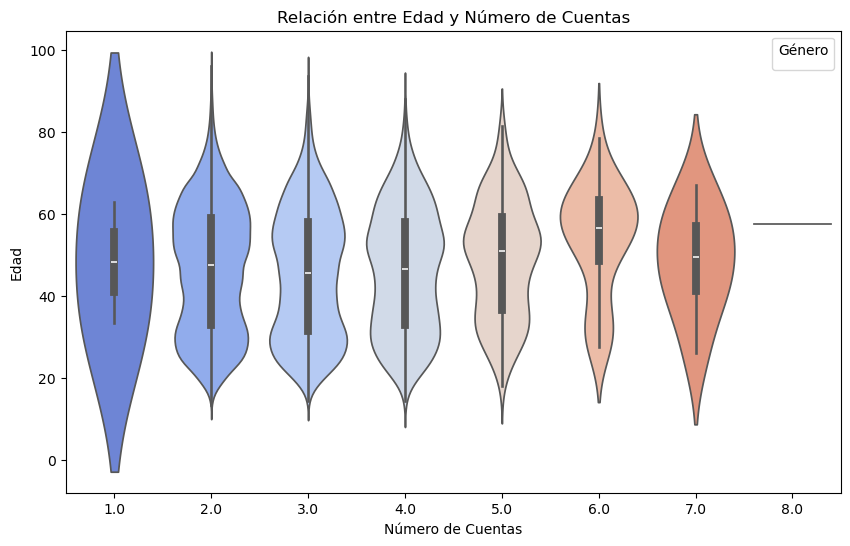

In [42]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_demo, x='num_accts', y='clnt_age', palette="coolwarm")
plt.title('Relación entre Edad y Número de Cuentas')
plt.xlabel('Número de Cuentas')
plt.ylabel('Edad')
plt.legend(title='Género')
plt.show()



## 3. Unir df_web_combined y df_experiment

df_merged contendrá todos los datos de df_web junto con las columnas de df_experiment que tienen un client_id coincidente.

In [43]:
# Unir los DataFrames por 'client_id'
df_merged = pd.merge(web_data_final, df_experiment, on='client_id', how='inner')

In [44]:
df_merged = df_merged.sort_values(by=['client_id', 'visit_id', 'date_time'])

In [45]:
df_merged.head(20)

client_id             visitor_id                      visit_id  \
0         555  402506806_56087378777  637149525_38041617439_716659   
1         555  402506806_56087378777  637149525_38041617439_716659   
2         555  402506806_56087378777  637149525_38041617439_716659   
3         555  402506806_56087378777  637149525_38041617439_716659   
4         555  402506806_56087378777  637149525_38041617439_716659   
5         647   66758770_53988066587   40369564_40101682850_311847   
6         647   66758770_53988066587   40369564_40101682850_311847   
7         647   66758770_53988066587   40369564_40101682850_311847   
8         647   66758770_53988066587   40369564_40101682850_311847   
9         647   66758770_53988066587   40369564_40101682850_311847   
10        934  810392784_45004760546    7076463_57954418406_971348   
11        934  810392784_45004760546    7076463_57954418406_971348   
12        934  810392784_45004760546    7076463_57954418406_971348   
13        934  810392784_45004760546    7076463_57954418406_971348   
14       1028   42237450_62128060588  557292053_87239438319_391157   
15       1028   42237450_62128060588  557292053_87239438319_391157   
16       1028   42237450_62128060588  557292053_87239438319_391157   
17       1028   42237450_62128060588  557292053_87239438319_391157   
18       1028   42237450_62128060588  557292053_87239438319_391157   
19       1028   42237450_62128060588  557292053_87239438319_391157   

    process_step           date_time      next_date_time       time_diff  \
0              1 2017-04-15 12:57:56 2017-04-15 12:58:03 0 days 00:00:07   
1              2 2017-04-15 12:58:03 2017-04-15 12:58:35 0 days 00:00:32   
2              3 2017-04-15 12:58:35 2017-04-15 13:00:14 0 days 00:01:39   
3              4 2017-04-15 13:00:14 2017-04-15 13:00:34 0 days 00:00:20   
4              5 2017-04-15 13:00:34                 NaT             NaT   
5              1 2017-04-12 15:41:28 2017-04-12 15:41:35 0 days 00:00:07   
6              2 2017-04-12 15:41:35 2017-04-12 15:41:53 0 days 00:00:18   
7              3 2017-04-12 15:41:53 2017-04-12 15:45:02 0 days 00:03:09   
8              4 2017-04-12 15:45:02 2017-04-12 15:47:45 0 days 00:02:43   
9              5 2017-04-12 15:47:45                 NaT             NaT   
10             1 2017-04-18 02:36:30 2017-04-18 02:37:02 0 days 00:00:32   
11             1 2017-04-18 02:37:02 2017-04-18 02:38:24 0 days 00:01:22   
12             1 2017-04-18 02:38:24 2017-04-18 02:38:52 0 days 00:00:28   
13             1 2017-04-18 02:38:52                 NaT             NaT   
14             1 2017-04-08 18:51:28 2017-04-08 18:52:17 0 days 00:00:49   
15             2 2017-04-08 18:52:17 2017-04-08 18:53:20 0 days 00:01:03   
16             2 2017-04-08 18:53:20 2017-04-08 18:53:29 0 days 00:00:09   
17             3 2017-04-08 18:53:29 2017-04-08 18:58:04 0 days 00:04:35   
18             4 2017-04-08 18:58:04 2017-04-08 18:59:55 0 days 00:01:51   
19             2 2017-04-08 18:59:55 2017-04-08 19:00:15 0 days 00:00:20   

    time_diff_seconds Variation  
0                 7.0      Test  
1                32.0      Test  
2                99.0      Test  
3                20.0      Test  
4                 NaN      Test  
5                 7.0      Test  
6                18.0      Test  
7               189.0      Test  
8               163.0      Test  
9                 NaN      Test  
10               32.0      Test  
11               82.0      Test  
12               28.0      Test  
13                NaN      Test  
14               49.0   Control  
15               63.0   Control  
16                9.0   Control  
17              275.0   Control  
18              111.0   Control  
19               20.0   Control

Exploramos el nuevo df

In [46]:
df_exploration(df_merged)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317235 entries, 0 to 317234
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   client_id          317235 non-null  int64          
 1   visitor_id         317235 non-null  object         
 2   visit_id           317235 non-null  object         
 3   process_step       317235 non-null  int64          
 4   date_time          317235 non-null  datetime64[ns] 
 5   next_date_time     247788 non-null  datetime64[ns] 
 6   time_diff          247788 non-null  timedelta64[ns]
 7   time_diff_seconds  247788 non-null  float64        
 8   Variation          317235 non-null  object         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3), timedelta64[ns](1)
memory usage: 24.2+ MB
None

Valores duplicados: 0

Valores nulos: 
client_id                0
visitor_id               0
visit_id                 0
process_step             0
date_tim

client_id             visitor_id                      visit_id  \
0             555  402506806_56087378777  637149525_38041617439_716659   
1             555  402506806_56087378777  637149525_38041617439_716659   
2             555  402506806_56087378777  637149525_38041617439_716659   
3             555  402506806_56087378777  637149525_38041617439_716659   
4             555  402506806_56087378777  637149525_38041617439_716659   
...           ...                    ...                           ...   
317230    9999729  834634258_21862004160  870243567_56915814033_814203   
317231    9999729  604429154_69247391147   99583652_41711450505_426179   
317232    9999729  604429154_69247391147   99583652_41711450505_426179   
317233    9999832  145538019_54444341400  472154369_16714624241_585315   
317234    9999832  145538019_54444341400  472154369_16714624241_585315   

        process_step           date_time      next_date_time       time_diff  \
0                  1 2017-04-15 12:57:56 2017-04-15 12:58:03 0 days 00:00:07   
1                  2 2017-04-15 12:58:03 2017-04-15 12:58:35 0 days 00:00:32   
2                  3 2017-04-15 12:58:35 2017-04-15 13:00:14 0 days 00:01:39   
3                  4 2017-04-15 13:00:14 2017-04-15 13:00:34 0 days 00:00:20   
4                  5 2017-04-15 13:00:34                 NaT             NaT   
...              ...                 ...                 ...             ...   
317230             5 2017-05-08 16:09:40                 NaT             NaT   
317231             1 2017-04-05 13:40:49 2017-04-05 13:41:04 0 days 00:00:15   
317232             2 2017-04-05 13:41:04                 NaT             NaT   
317233             1 2017-05-16 16:46:03 2017-05-16 16:46:11 0 days 00:00:08   
317234             2 2017-05-16 16:46:11                 NaT             NaT   

        time_diff_seconds Variation  
0                     7.0      Test  
1                    32.0      Test  
2                    99.0      Test  
3                    20.0      Test  
4                     NaN      Test  
...                   ...       ...  
317230                NaN      Test  
317231               15.0      Test  
317232                NaN      Test  
317233                8.0      Test  
317234                NaN      Test  

[317235 rows x 9 columns]

In [47]:
df_merged['Variation'].value_counts()

Test       176699
Control    140536
Name: Variation, dtype: int64

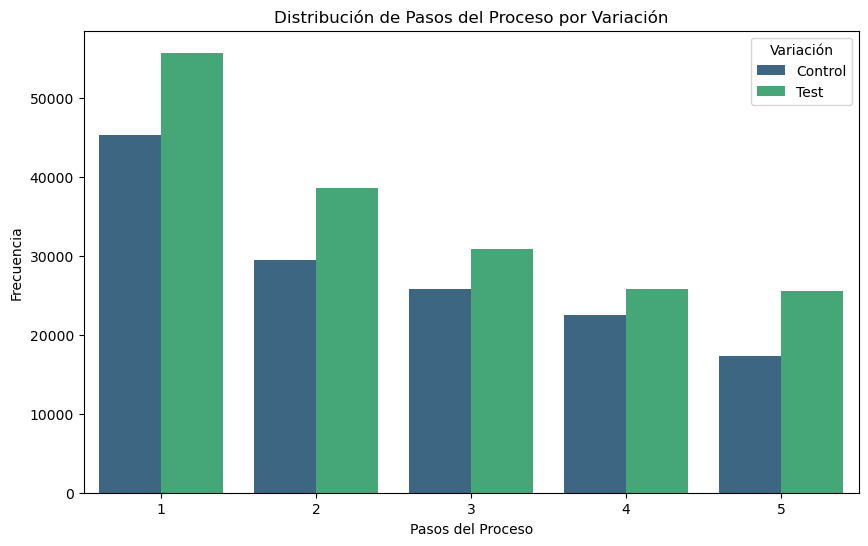

In [48]:
# Contar la frecuencia de cada 'process_step' y agregar la variación
process_counts = df_merged.groupby(['process_step', 'Variation']).size().reset_index(name='counts')

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=process_counts, x='process_step', y='counts', hue='Variation', palette='viridis')

plt.title('Distribución de Pasos del Proceso por Variación')
plt.xlabel('Pasos del Proceso')
plt.ylabel('Frecuencia')
plt.legend(title='Variación')  # Título para la leyenda
plt.show()

## Performance Metrics



### 1. Tasa de Finalización (Completion Rate)

La tasa de finalización se calcula al determinar cuántos usuarios llegan al paso final del proceso (confirm), y luego se compara el número de estos usuarios con el total de usuarios.

In [49]:
# Filtrar las filas donde el process_step sea 'confirm'
completion_df = df_merged[df_merged['process_step'] == 5]

# Contar el número de visitas únicas (visit_id) que completaron el proceso para cada variación
completion_rate_control = completion_df[completion_df['Variation'] == 'Control']['visit_id'].nunique() / df_merged[df_merged['Variation'] == 'Control']['visit_id'].nunique()
completion_rate_test = completion_df[completion_df['Variation'] == 'Test']['visit_id'].nunique() / df_merged[df_merged['Variation'] == 'Test']['visit_id'].nunique()

print(f'Tasa de finalización - Control: {completion_rate_control:.2%}')
print(f'Tasa de finalización - Test: {completion_rate_test:.2%}')

Tasa de finalización - Control: 49.85%
Tasa de finalización - Test: 58.52%


In [50]:
# Determinar si el cliente llegó al paso 5
success_summary = df_merged.groupby('client_id')['process_step'].max().reset_index()

# Añadir una columna que indique si tuvo éxito (si el paso 5 está presente)
success_summary['success'] = success_summary['process_step'] == 5

In [51]:
success_summary

client_id  process_step  success
0            555             5     True
1            647             5     True
2            934             1    False
3           1028             4    False
4           1104             1    False
...          ...           ...      ...
50495    9999150             2    False
50496    9999400             5     True
50497    9999626             2    False
50498    9999729             5     True
50499    9999832             2    False

[50500 rows x 3 columns]

### 2. Tiempo Promedio en Cada Paso (Time Spent on Each Step)

Para calcular el tiempo promedio en cada paso, necesitamos calcular la diferencia de tiempo entre los pasos consecutivos para cada usuario. El resultado final será el tiempo promedio que cada grupo de usuarios pasa en cada paso.

In [52]:
# Asegúrate de que 'time_diff_seconds' ya está calculado en tu DataFrame
time_diff_sum = df_merged.groupby(['Variation', 'process_step'])['time_diff_seconds'].mean().reset_index()
time_diff_sum.head(20)

Variation  process_step  time_diff_seconds
0   Control             1          66.826566
1   Control             2          50.468456
2   Control             3          92.004730
3   Control             4         137.135454
4   Control             5         168.727083
5      Test             1          61.471494
6      Test             2          60.675430
7      Test             3          88.849153
8      Test             4         129.636784
9      Test             5         243.690389

In [53]:
time_per_client_step = df_merged.groupby(['client_id', 'process_step', 'Variation'])['time_diff_seconds'].sum().reset_index()
time_per_client_step.head(20)

client_id  process_step Variation  time_diff_seconds
0         555             1      Test                7.0
1         555             2      Test               32.0
2         555             3      Test               99.0
3         555             4      Test               20.0
4         555             5      Test                0.0
5         647             1      Test                7.0
6         647             2      Test               18.0
7         647             3      Test              189.0
8         647             4      Test              163.0
9         647             5      Test                0.0
10        934             1      Test              142.0
11       1028             1   Control               49.0
12       1028             2   Control               94.0
13       1028             3   Control              284.0
14       1028             4   Control              111.0
15       1104             1   Control                0.0
16       1186             1   Control               11.0
17       1186             2   Control               11.0
18       1186             3   Control                0.0
19       1195             1   Control               33.0

In [54]:
time_by_client = df_merged.groupby('client_id')['time_diff_seconds'].sum().reset_index()
time_by_client

client_id  time_diff_seconds
0            555              158.0
1            647              377.0
2            934              142.0
3           1028              538.0
4           1104                0.0
...          ...                ...
50495    9999150               18.0
50496    9999400              119.0
50497    9999626                8.0
50498    9999729              540.0
50499    9999832                8.0

[50500 rows x 2 columns]

### 3. Tasa de Error (Error Rate)
Para calcular la tasa de error, determinaremos si un usuario retrocede en el proceso, es decir, si va de un paso posterior a un paso anterior. Esto podría indicar confusión o un error.

In [55]:
# KPI 3: Tasa de error
df_merged['previous_step'] = df_merged.groupby(['client_id', 'visit_id', 'date_time'])['process_step'].shift(1)
df_merged['error'] = df_merged['process_step'] < df_merged['previous_step']  # True si hay un regreso
# Calcular la tasa de error por grupo (Control y Test)
error_rates = df_merged.groupby('Variation')['error'].mean().reset_index()

In [56]:
error_rates

Variation     error
0   Control  0.001131
1      Test  0.000566

In [57]:
# Agrupar por client_id para contar la cantidad de errores
error_count_summary = df_merged.groupby('client_id')['error'].sum().reset_index()
error_count_summary.columns = ['client_id', 'error_count']

In [58]:
error_count_summary

client_id  error_count
0            555            0
1            647            0
2            934            0
3           1028            0
4           1104            0
...          ...          ...
50495    9999150            0
50496    9999400            0
50497    9999626            0
50498    9999729            0
50499    9999832            0

[50500 rows x 2 columns]

In [59]:
# Agrupar por client_id para ver si hay al menos un error
error_summary = df_merged.groupby(['client_id', 'Variation'])['error'].any().reset_index()
error_summary = pd.merge(error_summary, error_count_summary, on='client_id', how='left')

In [60]:
error_summary

client_id Variation  error  error_count
0            555      Test  False            0
1            647      Test  False            0
2            934      Test  False            0
3           1028   Control  False            0
4           1104   Control  False            0
...          ...       ...    ...          ...
50495    9999150      Test  False            0
50496    9999400      Test  False            0
50497    9999626      Test  False            0
50498    9999729      Test  False            0
50499    9999832      Test  False            0

[50500 rows x 4 columns]

In [61]:
# Contar el número de visitor_id únicos por cada client_id
unique_visitors = df_merged.groupby('client_id')['visitor_id'].nunique().reset_index()
unique_visitors.columns = ['client_id', 'unique_visitor_count']

# Contar el número de visit_id únicos por cada client_id
unique_visits = df_merged.groupby('client_id')['visit_id'].nunique().reset_index()
unique_visits.columns = ['client_id', 'unique_visit_count']

# Contar el número de visit_id únicos por cada combinación de client_id y visitor_id
unique_visits_by_visitor = df_merged.groupby(['client_id', 'visitor_id'])['visit_id'].nunique().reset_index()
unique_visits_by_visitor.columns = ['client_id', 'visitor_id', 'unique_visit_count_per_visitor']

# Unir los DataFrames en uno solo
client_id_summary = pd.merge(unique_visitors, unique_visits, on='client_id', how='outer')
client_id_summary = pd.merge(client_id_summary, unique_visits_by_visitor.groupby('client_id')['unique_visit_count_per_visitor'].sum().reset_index(), on='client_id', how='outer')

In [62]:
client_id_summary

client_id  unique_visitor_count  unique_visit_count  \
0            555                     1                   1   
1            647                     1                   1   
2            934                     1                   1   
3           1028                     1                   1   
4           1104                     1                   2   
...          ...                   ...                 ...   
50495    9999150                     1                   1   
50496    9999400                     1                   1   
50497    9999626                     1                   1   
50498    9999729                     3                   3   
50499    9999832                     1                   1   

       unique_visit_count_per_visitor  
0                                   1  
1                                   1  
2                                   1  
3                                   1  
4                                   2  
...                               ...  
50495                               1  
50496                               1  
50497                               1  
50498                               3  
50499                               1  

[50500 rows x 4 columns]

In [64]:
time_per_client_step

client_id  process_step Variation  time_diff_seconds
0             555             1      Test                7.0
1             555             2      Test               32.0
2             555             3      Test               99.0
3             555             4      Test               20.0
4             555             5      Test                0.0
...           ...           ...       ...                ...
207822    9999729             3      Test              120.0
207823    9999729             4      Test               21.0
207824    9999729             5      Test                0.0
207825    9999832             1      Test                8.0
207826    9999832             2      Test                0.0

[207827 rows x 4 columns]

In [63]:
success_summary


client_id  process_step  success
0            555             5     True
1            647             5     True
2            934             1    False
3           1028             4    False
4           1104             1    False
...          ...           ...      ...
50495    9999150             2    False
50496    9999400             5     True
50497    9999626             2    False
50498    9999729             5     True
50499    9999832             2    False

[50500 rows x 3 columns]

In [65]:
time_by_client

client_id  time_diff_seconds
0            555              158.0
1            647              377.0
2            934              142.0
3           1028              538.0
4           1104                0.0
...          ...                ...
50495    9999150               18.0
50496    9999400              119.0
50497    9999626                8.0
50498    9999729              540.0
50499    9999832                8.0

[50500 rows x 2 columns]

In [66]:
error_summary

client_id Variation  error  error_count
0            555      Test  False            0
1            647      Test  False            0
2            934      Test  False            0
3           1028   Control  False            0
4           1104   Control  False            0
...          ...       ...    ...          ...
50495    9999150      Test  False            0
50496    9999400      Test  False            0
50497    9999626      Test  False            0
50498    9999729      Test  False            0
50499    9999832      Test  False            0

[50500 rows x 4 columns]

In [67]:
data_summary = pd.merge(success_summary, time_by_client, on='client_id', how='outer').merge(error_summary, on='client_id', how='outer')


In [69]:
#ordenar columnas de data_summary
data_summary = data_summary[['client_id', 'process_step', 'success', 'time_diff_seconds', 'error', 'error_count', 'Variation']]
data_summary

client_id  process_step  success  time_diff_seconds  error  \
0            555             5     True              158.0  False   
1            647             5     True              377.0  False   
2            934             1    False              142.0  False   
3           1028             4    False              538.0  False   
4           1104             1    False                0.0  False   
...          ...           ...      ...                ...    ...   
50495    9999150             2    False               18.0  False   
50496    9999400             5     True              119.0  False   
50497    9999626             2    False                8.0  False   
50498    9999729             5     True              540.0  False   
50499    9999832             2    False                8.0  False   

       error_count Variation  
0                0      Test  
1                0      Test  
2                0      Test  
3                0   Control  
4                0   Control  
...            ...       ...  
50495            0      Test  
50496            0      Test  
50497            0      Test  
50498            0      Test  
50499            0      Test  

[50500 rows x 7 columns]

In [70]:
df_exploration(data_summary)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50500 entries, 0 to 50499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          50500 non-null  int64  
 1   process_step       50500 non-null  int64  
 2   success            50500 non-null  bool   
 3   time_diff_seconds  50500 non-null  float64
 4   error              50500 non-null  bool   
 5   error_count        50500 non-null  int64  
 6   Variation          50500 non-null  object 
dtypes: bool(2), float64(1), int64(3), object(1)
memory usage: 2.4+ MB
None

Valores duplicados: 0

Valores nulos: 
client_id            0
process_step         0
success              0
time_diff_seconds    0
error                0
error_count          0
Variation            0
dtype: int64

Valores unicos: 
client_id            50500
process_step             5
success                  2
time_diff_seconds     3280
error                    2
error_count      

client_id  process_step  success  time_diff_seconds  error  \
0            555             5     True              158.0  False   
1            647             5     True              377.0  False   
2            934             1    False              142.0  False   
3           1028             4    False              538.0  False   
4           1104             1    False                0.0  False   
...          ...           ...      ...                ...    ...   
50495    9999150             2    False               18.0  False   
50496    9999400             5     True              119.0  False   
50497    9999626             2    False                8.0  False   
50498    9999729             5     True              540.0  False   
50499    9999832             2    False                8.0  False   

       error_count Variation  
0                0      Test  
1                0      Test  
2                0      Test  
3                0   Control  
4                0   Control  
...            ...       ...  
50495            0      Test  
50496            0      Test  
50497            0      Test  
50498            0      Test  
50499            0      Test  

[50500 rows x 7 columns]

In [71]:
df_exploration(time_per_client_step)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207827 entries, 0 to 207826
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   client_id          207827 non-null  int64  
 1   process_step       207827 non-null  int64  
 2   Variation          207827 non-null  object 
 3   time_diff_seconds  207827 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.3+ MB
None

Valores duplicados: 0

Valores nulos: 
client_id            0
process_step         0
Variation            0
time_diff_seconds    0
dtype: int64

Valores unicos: 
client_id            50500
process_step             5
Variation                2
time_diff_seconds     2742
dtype: int64


client_id  process_step Variation  time_diff_seconds
0             555             1      Test                7.0
1             555             2      Test               32.0
2             555             3      Test               99.0
3             555             4      Test               20.0
4             555             5      Test                0.0
...           ...           ...       ...                ...
207822    9999729             3      Test              120.0
207823    9999729             4      Test               21.0
207824    9999729             5      Test                0.0
207825    9999832             1      Test                8.0
207826    9999832             2      Test                0.0

[207827 rows x 4 columns]